<a href="https://colab.research.google.com/github/haikalprojectt1-rgb/Pemrograman-web-uts/blob/Deploy-from-a-branch/Kecerdasan_Buatan_Haikal_Ammanu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama	: Haikal ammanu
Kelas	: 05TLPE004
Visualisasi Fungsi Keanggotaan:


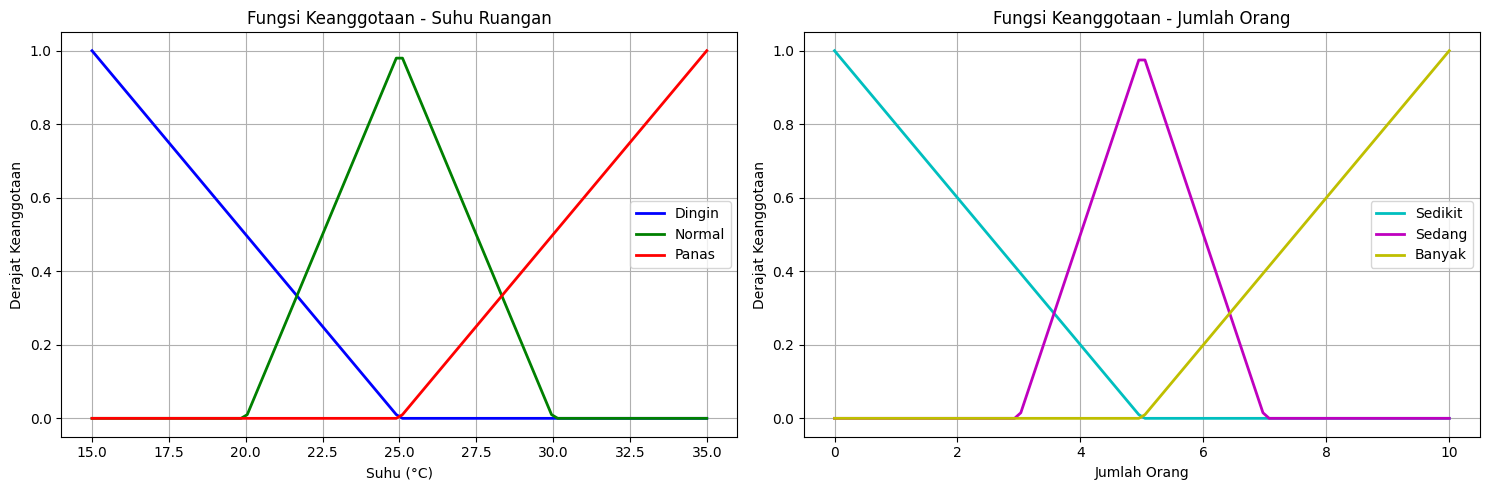


Surface Response Sistem:


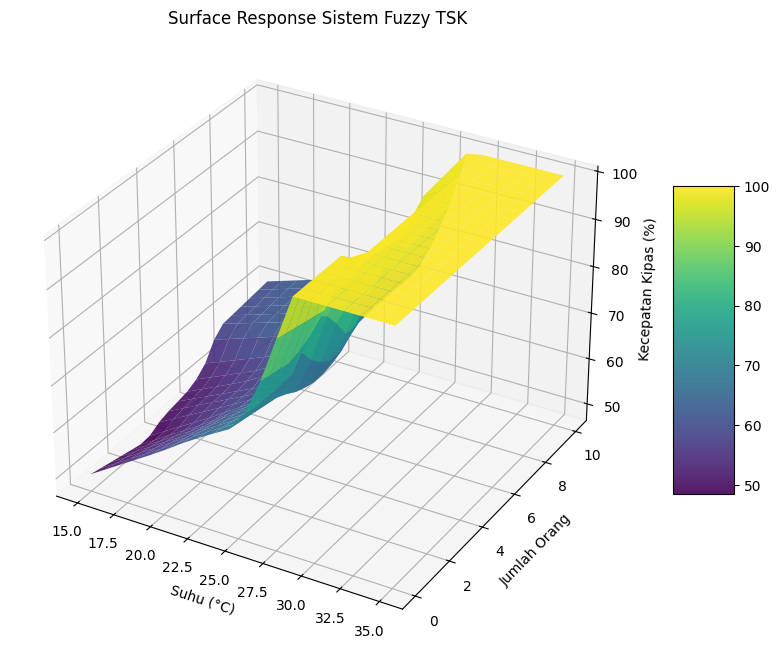


Hasil Inferensi untuk Contoh Kasus:
Suhu     Orang    Kecepatan Kipas
--------------------------------------------------
18       2        54.00          
22       4        60.60          
28       6        88.33          
32       8        100.00         
25       5        63.50          


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class FuzzyTSK:
    def __init__(self):
        # Fungsi keanggotaan untuk suhu ruangan
        self.temp_cold = lambda x: max(0, min(1, (25 - x) / 10)) if x <= 25 else 0
        self.temp_normal = lambda x: max(0, min((x - 20) / 5, (30 - x) / 5)) if 20 <= x <= 30 else 0
        self.temp_hot = lambda x: max(0, min(1, (x - 25) / 10)) if x >= 25 else 0

        # Fungsi keanggotaan untuk jumlah orang
        self.people_few = lambda x: max(0, min(1, (5 - x) / 5)) if x <= 5 else 0
        self.people_medium = lambda x: max(0, min((x - 3) / 2, (7 - x) / 2)) if 3 <= x <= 7 else 0
        self.people_many = lambda x: max(0, min(1, (x - 5) / 5)) if x >= 5 else 0

        # Aturan TSK (konsekuen berupa fungsi linear)
        self.rules = [
            {'antecedent': [self.temp_cold, self.people_few],  'consequent': lambda t, p: 20 + 2*t - 1*p},
            {'antecedent': [self.temp_cold, self.people_medium],  'consequent': lambda t, p: 30 + 1.5*t - 0.5*p},
            {'antecedent': [self.temp_cold, self.people_many],  'consequent': lambda t, p: 40 + 1*t + 0.5*p},
            {'antecedent': [self.temp_normal, self.people_few],  'consequent': lambda t, p: 25 + 1.8*t - 0.8*p},
            {'antecedent': [self.temp_normal, self.people_medium],  'consequent': lambda t, p: 35 + 1.2*t - 0.3*p},
            {'antecedent': [self.temp_normal, self.people_many],  'consequent': lambda t, p: 45 + 0.8*t + 0.4*p},
            {'antecedent': [self.temp_hot, self.people_few],  'consequent': lambda t, p: 50 + 2.5*t - 1.2*p},
            {'antecedent': [self.temp_hot, self.people_medium],  'consequent': lambda t, p: 60 + 2*t - 0.8*p},
            {'antecedent': [self.temp_hot, self.people_many],  'consequent': lambda t, p: 70 + 1.5*t + 0.6*p}
        ]

    def infer(self, temperature, people):
        """Melakukan inferensi TSK"""
        firing_strengths = []
        rule_outputs = []

        for rule in self.rules:
            fs = min(rule['antecedent'][0](temperature), rule['antecedent'][1](people))
            firing_strengths.append(fs)
            rule_outputs.append(rule['consequent'](temperature, people))

        if sum(firing_strengths) == 0:
            return 0

        output = sum(fs * out for fs, out in zip(firing_strengths, rule_outputs)) / sum(firing_strengths)
        return max(0, min(100, output))

    def plot_membership_functions(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        temps = np.linspace(15, 35, 100)
        cold = [self.temp_cold(t) for t in temps]
        normal = [self.temp_normal(t) for t in temps]
        hot = [self.temp_hot(t) for t in temps]

        ax1.plot(temps, cold, 'b-', label='Dingin', linewidth=2)
        ax1.plot(temps, normal, 'g-', label='Normal', linewidth=2)
        ax1.plot(temps, hot, 'r-', label='Panas', linewidth=2)
        ax1.set_title('Fungsi Keanggotaan - Suhu Ruangan')
        ax1.set_xlabel('Suhu (°C)')
        ax1.set_ylabel('Derajat Keanggotaan')
        ax1.legend()
        ax1.grid(True)

        people = np.linspace(0, 10, 100)
        few = [self.people_few(p) for p in people]
        medium = [self.people_medium(p) for p in people]
        many = [self.people_many(p) for p in people]

        ax2.plot(people, few, 'c-', label='Sedikit', linewidth=2)
        ax2.plot(people, medium, 'm-', label='Sedang', linewidth=2)
        ax2.plot(people, many, 'y-', label='Banyak', linewidth=2)
        ax2.set_title('Fungsi Keanggotaan - Jumlah Orang')
        ax2.set_xlabel('Jumlah Orang')
        ax2.set_ylabel('Derajat Keanggotaan')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_surface(self):
        temps = np.linspace(15, 35, 20)
        people = np.linspace(0, 10, 20)
        T, P = np.meshgrid(temps, people)
        Z = np.zeros_like(T)

        for i in range(T.shape[0]):
            for j in range(T.shape[1]):
                Z[i, j] = self.infer(T[i, j], P[i, j])

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(T, P, Z, cmap='viridis', alpha=0.9)

        ax.set_xlabel('Suhu (°C)')
        ax.set_ylabel('Jumlah Orang')
        ax.set_zlabel('Kecepatan Kipas (%)')
        ax.set_title('Surface Response Sistem Fuzzy TSK')
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
        plt.show()


def main():
    fuzzy_system = FuzzyTSK()

    print("Nama\t: Haikal ammanu")
    print("Kelas\t: 05TLPE004")

    print("Visualisasi Fungsi Keanggotaan:")
    fuzzy_system.plot_membership_functions()

    print("\nSurface Response Sistem:")
    fuzzy_system.plot_surface()

    test_cases = [
        (18, 2),
        (22, 4),
        (28, 6),
        (32, 8),
        (25, 5)
    ]

    print("\nHasil Inferensi untuk Contoh Kasus:")
    print("=" * 50)
    print(f"{'Suhu':<8} {'Orang':<8} {'Kecepatan Kipas':<15}")
    print("-" * 50)

    for temp, ppl in test_cases:
        fan_speed = fuzzy_system.infer(temp, ppl)
        print(f"{temp:<8} {ppl:<8} {fan_speed:<15.2f}")


if __name__ == "__main__":
    main()
